In [2]:
from helper import *

In [4]:
dataset_name = "CIFAR10"
model_cfg = models.LeNet5CIFAR
title = model_cfg.__name__ + "_" + dataset_name + "_federated"
pretrained_init = False
pretrained_clients = False
n_clients = 10
n_classes = 10

In [5]:
seed = 42
torch.backends.cudnn.benchmark = True
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

In [6]:
dataset = getattr(torchvision.datasets, dataset_name)

batch_size = 256
train_dataset = dataset(root='./data', train=True, download=True, transform=ToTensor())
test_dataset = dataset(root='./data', train=False, download=True, transform=ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
pretrained_init = False

In [10]:
general_model = model_cfg.base(*model_cfg.args, **model_cfg.kwargs)
title_pretrained_init = "pretrained_init" + title

if not pretrained_init:
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(general_model.parameters(), lr=1e-1)
    wd = 0.0
    lr_init = 1e-1
    train(general_model, train_loader, test_loader, optimizer, criterion, lr_init, title=title_pretrained_init, epochs=20)
else:
    general_model.load_state_dict(torch.load("ckpts/" + title_pretrained_init + ".pt"))

idx: 0, loss: 2.2983267307281494
idx: 10, loss: 2.302321434020996
idx: 20, loss: 2.298173427581787
idx: 30, loss: 2.300368070602417
idx: 40, loss: 2.297823429107666
idx: 50, loss: 2.2920451164245605
idx: 60, loss: 2.296782970428467
idx: 70, loss: 2.2844386100769043
idx: 80, loss: 2.2673325538635254
idx: 90, loss: 2.231943130493164
idx: 100, loss: 2.2233736515045166
idx: 110, loss: 2.2230281829833984
idx: 120, loss: 2.206540584564209
idx: 130, loss: 2.2532718181610107
idx: 140, loss: 2.1914708614349365
idx: 150, loss: 2.1296679973602295
idx: 160, loss: 2.329716920852661
idx: 170, loss: 2.104318141937256
idx: 180, loss: 2.120154857635498
idx: 190, loss: 2.1734631061553955
Epoch 0. LR: 0.1. Loss: 2.1212 Accuracy 0.2559
idx: 0, loss: 2.008105993270874
idx: 10, loss: 1.9851776361465454
idx: 20, loss: 1.997780680656433
idx: 30, loss: 2.033891439437866
idx: 40, loss: 2.1968095302581787
idx: 50, loss: 2.084439516067505
idx: 60, loss: 2.0306594371795654
idx: 70, loss: 1.9854953289031982
idx: 80

idx: 180, loss: 1.1577163934707642
idx: 190, loss: 1.135966181755066
idx: 0, loss: 1.1027967929840088
idx: 10, loss: 1.0910338163375854
idx: 20, loss: 1.2144562005996704
idx: 30, loss: 1.1291475296020508
idx: 40, loss: 1.281105399131775
idx: 50, loss: 1.137233018875122
idx: 60, loss: 1.1934386491775513
idx: 70, loss: 1.1079585552215576
idx: 80, loss: 1.1727821826934814
idx: 90, loss: 1.0997987985610962
idx: 100, loss: 1.1043123006820679
idx: 110, loss: 1.0190353393554688
idx: 120, loss: 1.2051575183868408
idx: 130, loss: 1.242087721824646
idx: 140, loss: 1.0955946445465088
idx: 150, loss: 1.0784777402877808
idx: 160, loss: 1.1355819702148438
idx: 170, loss: 1.0593883991241455
idx: 180, loss: 1.1055535078048706
idx: 190, loss: 1.0833122730255127
idx: 0, loss: 1.05419921875
idx: 10, loss: 1.0568597316741943
idx: 20, loss: 1.1827857494354248
idx: 30, loss: 1.0840541124343872
idx: 40, loss: 1.2490646839141846
idx: 50, loss: 1.093461513519287
idx: 60, loss: 1.1592199802398682
idx: 70, loss:

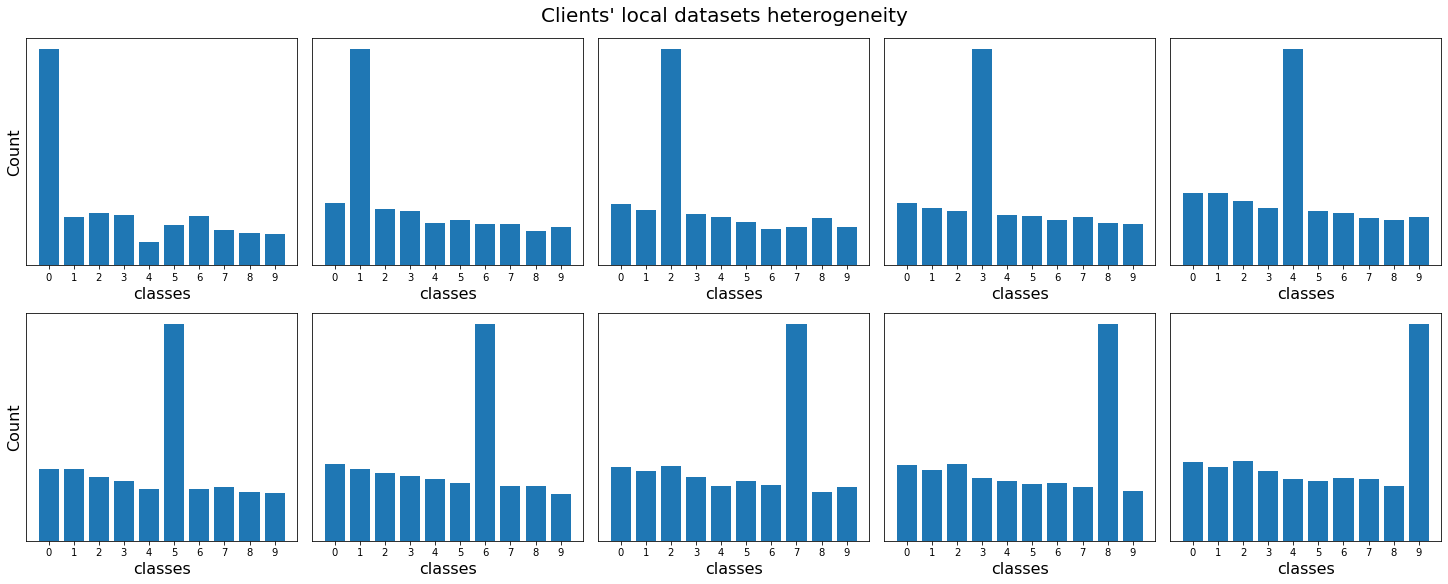

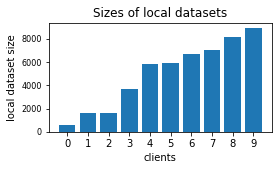

In [11]:
client_loaders = noniid_datasets(train_loader, n_clients=10, n_classes=10)
visualizing_client_loader(client_loaders, n_clients, n_classes, path_figures="./figures/"+title)

In [12]:
pretrained_clients = False

In [26]:
if not pretrained_clients:
    s = sum(1 for _ in general_model.parameters())
    for i in range(n_clients):
        loader_i = client_loaders[i]
        model = model_cfg.base(*model_cfg.args, **model_cfg.kwargs)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
        for j, (param, param_client) in enumerate(zip(model.parameters(), general_model.parameters())):
            if j <= s - 2: #we do not wish to copy/clone the weights of the last layer (logistic regression layer in the report)
                param.data = param_client.data.clone()
        title_i = "parametrized_preclient_" + title + str(i)
        wd = 0.0
        lr_init = 1e-1
        train(model, loader_i, test_loader, optimizer, criterion, lr_init, title=title_i, epochs=10)

idx: 0, loss: 1.0535824298858643
Epoch 0. LR: 0.1. Loss: 2.1110 Accuracy 0.2183
idx: 0, loss: 1.9471337795257568
idx: 0, loss: 1.5498464107513428
idx: 0, loss: 1.4049259424209595
idx: 0, loss: 1.268739104270935
idx: 0, loss: 1.221419095993042
idx: 0, loss: 1.0159472227096558
idx: 0, loss: 0.9276743531227112
idx: 0, loss: 0.8537327647209167
idx: 0, loss: 0.8344661593437195
Epoch 9. LR: 0.005. Loss: 0.8224 Accuracy 0.3608
idx: 0, loss: 1.122108817100525
idx: 10, loss: 1.2149640321731567
idx: 20, loss: 1.3815960884094238
Epoch 0. LR: 0.1. Loss: 1.0630 Accuracy 0.3483
idx: 0, loss: 1.3204907178878784
idx: 10, loss: 1.081462025642395
idx: 20, loss: 1.7334052324295044
idx: 0, loss: 1.0537391901016235
idx: 10, loss: 1.0780999660491943
idx: 20, loss: 1.334381341934204
idx: 0, loss: 0.7740751504898071
idx: 10, loss: 0.8381165862083435
idx: 20, loss: 2.1036624908447266
idx: 0, loss: 0.8253253698348999
idx: 10, loss: 0.7054605484008789
idx: 20, loss: 2.1706037521362305
idx: 0, loss: 0.55247443914

idx: 30, loss: 1.667216181755066
idx: 40, loss: 1.4791033267974854
idx: 50, loss: 1.6309397220611572
idx: 60, loss: 1.5671765804290771
idx: 70, loss: 1.4396001100540161
idx: 80, loss: 1.4574655294418335
idx: 90, loss: 1.4965851306915283
Epoch 0. LR: 0.1. Loss: 2.0008 Accuracy 0.2779
idx: 0, loss: 1.840539574623108
idx: 10, loss: 1.244763731956482
idx: 20, loss: 1.3836791515350342
idx: 30, loss: 1.3415844440460205
idx: 40, loss: 1.1862151622772217
idx: 50, loss: 1.2897522449493408
idx: 60, loss: 1.370041847229004
idx: 70, loss: 1.3239562511444092
idx: 80, loss: 1.2843530178070068
idx: 90, loss: 1.1942065954208374
idx: 0, loss: 2.7417283058166504
idx: 10, loss: 1.2701680660247803
idx: 20, loss: 1.2599228620529175
idx: 30, loss: 1.1870954036712646
idx: 40, loss: 1.1179481744766235
idx: 50, loss: 1.2009656429290771
idx: 60, loss: 1.2733567953109741
idx: 70, loss: 1.2802672386169434
idx: 80, loss: 1.1365500688552856
idx: 90, loss: 1.1632025241851807
idx: 0, loss: 1.5693072080612183
idx: 10,

idx: 90, loss: 0.9500964879989624
idx: 100, loss: 1.0031934976577759
idx: 0, loss: 0.775942862033844
idx: 10, loss: 1.0219191312789917
idx: 20, loss: 0.8553063273429871
idx: 30, loss: 0.9667776226997375
idx: 40, loss: 1.0971323251724243
idx: 50, loss: 0.8300703763961792
idx: 60, loss: 0.820277750492096
idx: 70, loss: 1.4354392290115356
idx: 80, loss: 0.8817073702812195
idx: 90, loss: 0.8238431811332703
idx: 100, loss: 0.7578982710838318
idx: 0, loss: 0.7523395419120789
idx: 10, loss: 0.8460105657577515
idx: 20, loss: 0.676371157169342
idx: 30, loss: 0.8185899257659912
idx: 40, loss: 0.8866395354270935
idx: 50, loss: 0.7002138495445251
idx: 60, loss: 0.7808576226234436
idx: 70, loss: 1.4993335008621216
idx: 80, loss: 0.7922071218490601
idx: 90, loss: 1.050927758216858
idx: 100, loss: 0.7942167520523071
idx: 0, loss: 0.6838041543960571
idx: 10, loss: 0.6342089176177979
idx: 20, loss: 0.678122341632843
idx: 30, loss: 0.7754499316215515
idx: 40, loss: 0.7392284274101257
idx: 50, loss: 0.66

idx: 130, loss: 0.9356392025947571
idx: 0, loss: 1.2483857870101929
idx: 10, loss: 1.035723328590393
idx: 20, loss: 0.9618673920631409
idx: 30, loss: 1.0080251693725586
idx: 40, loss: 0.9677816033363342
idx: 50, loss: 1.1702501773834229
idx: 60, loss: 0.9925801157951355
idx: 70, loss: 1.224686622619629
idx: 80, loss: 1.287841558456421
idx: 90, loss: 1.0804623365402222
idx: 100, loss: 1.1592475175857544
idx: 110, loss: 0.8765838742256165
idx: 120, loss: 1.3079520463943481
idx: 130, loss: 0.9324391484260559
idx: 0, loss: 0.904832661151886
idx: 10, loss: 0.8268502354621887
idx: 20, loss: 0.8917683959007263
idx: 30, loss: 0.9751784205436707
idx: 40, loss: 0.8490034937858582
idx: 50, loss: 1.0967971086502075
idx: 60, loss: 0.9806839227676392
idx: 70, loss: 1.1487693786621094
idx: 80, loss: 1.2272217273712158
idx: 90, loss: 1.0498191118240356
idx: 100, loss: 1.0527517795562744
idx: 110, loss: 0.7934918403625488
idx: 120, loss: 0.9459670782089233
idx: 130, loss: 0.7750368118286133
idx: 0, los

In [49]:
clients = [SWAG(model_cfg.base, subspace_type="pca", *model_cfg.args, **model_cfg.kwargs, 
                  subspace_kwargs={"max_rank": 2, "pca_rank": 2}) for i in range(n_clients)]
probs = []

In [35]:
for i in range(n_clients):
    lr_init = 1e-2
    wd = 0.0
    epochs=10
    title_i = "parametrized_preclient_" + title + str(i)
    new_title_i = "swag_" + title_i
    
    swag_model_i = clients[i]
    loader_i = client_loaders[i]
    model = model_cfg.base(*model_cfg.args, **model_cfg.kwargs)

    model.load_state_dict(torch.load("ckpts/" + title_i + ".pt"))
    optimizer = torch.optim.SGD(model.parameters(), lr=lr_init, weight_decay=wd)
    
    #test_loader is only included to display accuracy
    train(model, loader_i, test_loader, optimizer, criterion, lr_init, epochs, title=new_title_i, print_freq=10, 
          swag=True, swag_model=swag_model_i, swag_start=2, swag_freq=3, swag_lr=1e-2)
#     all_probs = model_averaging(swag_model_i, model=model_cfg.base(*model_cfg.args, **model_cfg.kwargs), loader=test_loader)
#     probs.append(all_probs)

idx: 0, loss: 0.8231602907180786
Epoch 0. LR: 0.01. Loss: 0.8292 Accuracy 0.3643
idx: 0, loss: 0.8111387491226196
idx: 0, loss: 0.7960250973701477
idx: 0, loss: 0.780892014503479
idx: 0, loss: 0.7676553726196289
idx: 0, loss: 0.7540876269340515
idx: 0, loss: 0.7418341040611267
idx: 0, loss: 0.7292932271957397
idx: 0, loss: 0.7173717021942139
idx: 0, loss: 0.7054067850112915
Epoch 9. LR: 0.01. Loss: 0.7014 Accuracy 0.3690
idx: 0, loss: 0.20655947923660278
idx: 10, loss: 0.26263126730918884
idx: 20, loss: 0.2537453770637512
Epoch 0. LR: 0.01. Loss: 0.0095 Accuracy 0.4964
idx: 0, loss: 0.1940150409936905
idx: 10, loss: 0.2464907467365265
idx: 20, loss: 0.24293778836727142
idx: 0, loss: 0.18172450363636017
idx: 10, loss: 0.2341068834066391
idx: 20, loss: 0.23401044309139252
idx: 0, loss: 0.17211401462554932
idx: 10, loss: 0.22277949750423431
idx: 20, loss: 0.22443988919258118
idx: 0, loss: 0.16195064783096313
idx: 10, loss: 0.21292202174663544
idx: 20, loss: 0.21470941603183746
idx: 0, los

idx: 90, loss: 0.2691536843776703
Epoch 9. LR: 0.01. Loss: 0.2692 Accuracy 0.5061
idx: 0, loss: 0.6639665961265564
idx: 10, loss: 0.5975630879402161
idx: 20, loss: 0.6605189442634583
idx: 30, loss: 0.5184037089347839
idx: 40, loss: 0.611833393573761
idx: 50, loss: 0.5057381987571716
idx: 60, loss: 0.5095316171646118
idx: 70, loss: 0.5788160562515259
idx: 80, loss: 0.4808846116065979
idx: 90, loss: 0.4296436309814453
Epoch 0. LR: 0.01. Loss: 0.0407 Accuracy 0.5001
idx: 0, loss: 0.6427310705184937
idx: 10, loss: 0.5892300009727478
idx: 20, loss: 0.6394675374031067
idx: 30, loss: 0.5001548528671265
idx: 40, loss: 0.5895577669143677
idx: 50, loss: 0.4886220693588257
idx: 60, loss: 0.4956795573234558
idx: 70, loss: 0.5584624409675598
idx: 80, loss: 0.4749327003955841
idx: 90, loss: 0.41574835777282715
idx: 0, loss: 0.6108229160308838
idx: 10, loss: 0.5724958777427673
idx: 20, loss: 0.6199097633361816
idx: 30, loss: 0.4840222895145416
idx: 40, loss: 0.569527804851532
idx: 50, loss: 0.4727484

idx: 0, loss: 0.34615376591682434
idx: 10, loss: 0.3567200005054474
idx: 20, loss: 0.29383838176727295
idx: 30, loss: 0.44755232334136963
idx: 40, loss: 0.3866872191429138
idx: 50, loss: 0.3124746084213257
idx: 60, loss: 0.3330642282962799
idx: 70, loss: 0.4864886999130249
idx: 80, loss: 0.36100339889526367
idx: 90, loss: 0.39517542719841003
idx: 100, loss: 0.3888612389564514
idx: 0, loss: 0.3288997709751129
idx: 10, loss: 0.3382546007633209
idx: 20, loss: 0.28217172622680664
idx: 30, loss: 0.4259466528892517
idx: 40, loss: 0.36253076791763306
idx: 50, loss: 0.29962295293807983
idx: 60, loss: 0.3226347267627716
idx: 70, loss: 0.46280887722969055
idx: 80, loss: 0.34880927205085754
idx: 90, loss: 0.38125431537628174
idx: 100, loss: 0.37920618057250977
idx: 0, loss: 0.31385016441345215
idx: 10, loss: 0.32133087515830994
idx: 20, loss: 0.26907503604888916
idx: 30, loss: 0.40781593322753906
idx: 40, loss: 0.34135353565216064
idx: 50, loss: 0.2871224880218506
idx: 60, loss: 0.310543656349182

idx: 30, loss: 0.476304829120636
idx: 40, loss: 0.4208512604236603
idx: 50, loss: 0.5333333015441895
idx: 60, loss: 0.43820780515670776
idx: 70, loss: 0.5015947222709656
idx: 80, loss: 0.46536150574684143
idx: 90, loss: 0.4861721098423004
idx: 100, loss: 0.6150492429733276
idx: 110, loss: 0.24479274451732635
idx: 120, loss: 0.33895036578178406
idx: 130, loss: 0.40376344323158264
idx: 0, loss: 0.35040777921676636
idx: 10, loss: 0.43983274698257446
idx: 20, loss: 0.3644469380378723
idx: 30, loss: 0.45615100860595703
idx: 40, loss: 0.3963453769683838
idx: 50, loss: 0.5078591704368591
idx: 60, loss: 0.4212253987789154
idx: 70, loss: 0.4851554036140442
idx: 80, loss: 0.44750216603279114
idx: 90, loss: 0.466229647397995
idx: 100, loss: 0.5983686447143555
idx: 110, loss: 0.23874732851982117
idx: 120, loss: 0.32487088441848755
idx: 130, loss: 0.3923630118370056
idx: 0, loss: 0.3316485583782196
idx: 10, loss: 0.4148848354816437
idx: 20, loss: 0.35404112935066223
idx: 30, loss: 0.440032213926315

In [36]:
Mu_s, Sigma_s = np.vstack([np.array(swag_model._get_mean_and_variance()[0]) for swag_model in clients]), np.vstack([np.array(swag_model._get_mean_and_variance()[1]) for swag_model in clients])

In [37]:
Sigma_server = np.reciprocal(np.sum(np.reciprocal(Sigma_s), axis=0))

In [38]:
Mu_server = np.multiply(Sigma_server, np.sum(np.multiply(Mu_s, np.reciprocal(Sigma_s)), axis=0))

In [39]:
model = model_cfg.base(*model_cfg.args, **model_cfg.kwargs)
set_weights(model, torch.tensor(Mu_server))
accuracy_model(model, test_loader, 'cpu')

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 23.24it/s]


25.33

In [42]:
model = model_cfg.base(*model_cfg.args, **model_cfg.kwargs)
for i in range(10):
    set_weights(model, torch.tensor(Mu_s[i]))
    print(f"Mu {i}:" , accuracy_model(model, test_loader, 'cpu'))

  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.80it/s]

Mu 0: 36.65


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.14it/s]

Mu 1: 49.62


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.66it/s]

Mu 2: 40.32


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.47it/s]

Mu 3: 43.95


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.18it/s]

Mu 4: 50.84


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.14it/s]

Mu 5: 50.13


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.69it/s]

Mu 6: 49.32


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.87it/s]

Mu 7: 52.74


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.12it/s]

Mu 8: 50.76


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 22.46it/s]

Mu 9: 54.14


In [47]:
new_mu_server = np.average(Mu_s[1:], weights=[len(client_loader.dataset) for client_loader in client_loaders.values()][1:], axis=0)
model = model_cfg.base(*model_cfg.args, **model_cfg.kwargs)
set_weights(model, torch.tensor(new_mu_server))
accuracy_model(model, test_loader, 'cpu')

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 23.37it/s]


41.23

In [34]:
all_probs = np.average(probs, weights=[len(client_loader.dataset) for client_loader in client_loaders.values()], axis=0)
ytest = np.array(test_loader.dataset.targets)
accuracy_all_probs(all_probs, ytest)

array([87.77])

In [35]:
accuracy_model(general_model, test_loader, 'cpu')

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.76it/s]


87.56

In [142]:
bayesian_swag_model = SWAG(model_cfg.base, subspace_type="pca", *model_cfg.args, **model_cfg.kwargs, 
                  subspace_kwargs={"max_rank": 2, "pca_rank": 2})
bayesian_swag_model.mean = torch.tensor(Mu_server)
bayesian_swag_model.sq_mean = torch.tensor(Sigma_server) + bayesian_swag_model.mean ** 2
all_probs_swag = diag_model_averaging(bayesian_swag_model, model=model_cfg.base(*model_cfg.args, **model_cfg.kwargs), loader=test_loader, S=5)
accuracy_all_probs(all_probs_swag, ytest)

array([87.42])

In [161]:
sgld = Sgld(model_cfg.base(*model_cfg.args, **model_cfg.kwargs))
sgld_path = "./ckpts/sgld_" + title + ".pt"
state_dict, save_dict = sgld.run(train_loader, test_loader, 10, params_optimizer={'lr' : 1e-2}, weight_decay=0.0, t_burn_in=5, path_save_samples=sgld_path)
sgld_all_probs = np.array(sgld_tools.predictions(test_loader, model, path=sgld_path, device='cpu'))

168it [00:08, 21.15it/s]

Accuracy = 44.1%, Mean loss = 1.595


235it [00:11, 20.80it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.93it/s]

--- Train --- Epoch 1, Accuracy = 52.60%, Loss = 314.181



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.70it/s]
3it [00:00, 21.96it/s]

--- Test --- Epoch: 1, Test accuracy: 76.36



167it [00:07, 22.00it/s]

Accuracy = 81.5%, Mean loss = 0.506


235it [00:10, 21.77it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.61it/s]

--- Train --- Epoch 2, Accuracy = 82.36%, Loss = 113.067



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.85it/s]
3it [00:00, 22.28it/s]

--- Test --- Epoch: 2, Test accuracy: 84.9



168it [00:07, 22.88it/s]

Accuracy = 85.9%, Mean loss = 0.386


235it [00:10, 21.41it/s]
  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.92it/s]

--- Train --- Epoch 3, Accuracy = 86.05%, Loss = 89.693



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 31.56it/s]
3it [00:00, 22.96it/s]

--- Test --- Epoch: 3, Test accuracy: 85.38



168it [00:07, 21.49it/s]

Accuracy = 87.2%, Mean loss = 0.352


235it [00:10, 21.75it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.15it/s]

--- Train --- Epoch 4, Accuracy = 87.17%, Loss = 82.319



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.37it/s]
3it [00:00, 20.19it/s]

--- Test --- Epoch: 4, Test accuracy: 86.39



169it [00:07, 22.36it/s]

Accuracy = 87.9%, Mean loss = 0.334


235it [00:10, 21.45it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.85it/s]

--- Train --- Epoch 5, Accuracy = 87.88%, Loss = 78.337



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.97it/s]
3it [00:00, 20.19it/s]

--- Test --- Epoch: 5, Test accuracy: 86.31



168it [00:07, 22.84it/s]

Accuracy = 88.3%, Mean loss = 0.321


235it [00:10, 22.40it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.58it/s]

--- Train --- Epoch 6, Accuracy = 88.22%, Loss = 75.392



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 35.27it/s]
3it [00:00, 21.49it/s]

--- Test --- Epoch: 6, Test accuracy: 86.87



168it [00:07, 22.75it/s]

Accuracy = 88.5%, Mean loss = 0.315


235it [00:10, 22.64it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.49it/s]

--- Train --- Epoch 7, Accuracy = 88.49%, Loss = 74.027



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 35.06it/s]
3it [00:00, 22.45it/s]

--- Test --- Epoch: 7, Test accuracy: 87.17



168it [00:07, 21.24it/s]

Accuracy = 88.7%, Mean loss = 0.309


235it [00:10, 22.42it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.33it/s]

--- Train --- Epoch 8, Accuracy = 88.67%, Loss = 72.618



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.33it/s]
3it [00:00, 24.66it/s]

--- Test --- Epoch: 8, Test accuracy: 87.36



168it [00:07, 22.71it/s]

Accuracy = 89.0%, Mean loss = 0.302


235it [00:10, 22.48it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.84it/s]

--- Train --- Epoch 9, Accuracy = 88.92%, Loss = 71.277



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.66it/s]
3it [00:00, 22.96it/s]

--- Test --- Epoch: 9, Test accuracy: 87.11



167it [00:07, 22.93it/s]

Accuracy = 89.1%, Mean loss = 0.298


235it [00:10, 22.75it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.38it/s]

--- Train --- Epoch 10, Accuracy = 89.11%, Loss = 70.070



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.75it/s]


--- Test --- Epoch: 10, Test accuracy: 87.48



In [162]:
psgld = Sgld(model_cfg.base(*model_cfg.args, **model_cfg.kwargs))
psgld_path = "./ckpts/psgld_" + title + ".pt"
pstate_dict, psave_dict = sgld.run(train_loader, test_loader, 10, params_optimizer={'lr' : 1e-2, 'precondition_decay_rate' : 0.95}, weight_decay=0.0, t_burn_in=5, path_save_samples=psgld_path)
psgld_all_probs = np.array(sgld_tools.predictions(test_loader, model, path=psgld_path, device='cpu'))

168it [00:07, 20.60it/s]

Accuracy = 90.1%, Mean loss = 0.269


235it [00:10, 21.82it/s]
  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.49it/s]

--- Train --- Epoch 1, Accuracy = 90.16%, Loss = 63.269



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 31.96it/s]
3it [00:00, 18.68it/s]

--- Test --- Epoch: 1, Test accuracy: 87.4



168it [00:08, 21.23it/s]

Accuracy = 89.4%, Mean loss = 0.293


235it [00:11, 20.75it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.48it/s]

--- Train --- Epoch 2, Accuracy = 89.30%, Loss = 68.587



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.97it/s]
3it [00:00, 19.04it/s]

--- Test --- Epoch: 2, Test accuracy: 87.0



169it [00:08, 19.88it/s]

Accuracy = 89.3%, Mean loss = 0.293


235it [00:11, 21.03it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.14it/s]

--- Train --- Epoch 3, Accuracy = 89.20%, Loss = 68.859



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 32.82it/s]
3it [00:00, 23.69it/s]

--- Test --- Epoch: 3, Test accuracy: 87.68



166it [00:07, 20.80it/s]

Accuracy = 89.3%, Mean loss = 0.287


235it [00:10, 21.43it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.58it/s]

--- Train --- Epoch 4, Accuracy = 89.39%, Loss = 67.352



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.23it/s]
3it [00:00, 19.79it/s]

--- Test --- Epoch: 4, Test accuracy: 87.56



168it [00:08, 20.86it/s]

Accuracy = 89.5%, Mean loss = 0.287


235it [00:11, 20.69it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.16it/s]

--- Train --- Epoch 5, Accuracy = 89.40%, Loss = 67.700



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 31.56it/s]
3it [00:00, 20.89it/s]

--- Test --- Epoch: 5, Test accuracy: 87.22



166it [00:07, 22.59it/s]

Accuracy = 89.6%, Mean loss = 0.284


235it [00:10, 21.38it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.87it/s]

--- Train --- Epoch 6, Accuracy = 89.53%, Loss = 66.942



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.59it/s]
3it [00:00, 21.64it/s]

--- Test --- Epoch: 6, Test accuracy: 87.48



166it [00:08, 20.85it/s]

Accuracy = 89.8%, Mean loss = 0.279


235it [00:11, 20.02it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.28it/s]

--- Train --- Epoch 7, Accuracy = 89.72%, Loss = 65.896



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.49it/s]
3it [00:00, 22.45it/s]

--- Test --- Epoch: 7, Test accuracy: 86.41



169it [00:08, 20.81it/s]

Accuracy = 89.8%, Mean loss = 0.280


235it [00:11, 20.81it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.49it/s]

--- Train --- Epoch 8, Accuracy = 89.75%, Loss = 65.781



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 32.90it/s]
3it [00:00, 23.87it/s]

--- Test --- Epoch: 8, Test accuracy: 87.48



166it [00:08, 21.43it/s]

Accuracy = 89.8%, Mean loss = 0.278


235it [00:11, 20.61it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.49it/s]

--- Train --- Epoch 9, Accuracy = 89.75%, Loss = 65.495



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.04it/s]
3it [00:00, 21.04it/s]

--- Test --- Epoch: 9, Test accuracy: 87.23



166it [00:08, 20.26it/s]

Accuracy = 89.9%, Mean loss = 0.276


235it [00:11, 20.71it/s]
 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.42it/s]

--- Train --- Epoch 10, Accuracy = 89.75%, Loss = 65.351



100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 32.06it/s]


--- Test --- Epoch: 10, Test accuracy: 87.07



In [176]:
save_calibration_scores(all_probs_swag, ytest, title="swag")
save_calibration_scores(sgld_all_probs, ytest, title="SGLD")
save_calibration_scores(psgld_all_probs, ytest, title="pSGLD")

ECE = 0.012781920509636314
BS = 0.1842097312136829
ECE = 0.019031228756904585
BS = 0.18201571612087292
ECE = 0.03195293451249596
BS = 0.1857441779598165


In [ ]:
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})
sns.set_style("darkgrid")
path_figures = path + "/figures"
tau_list = np.linspace(0, 1, num=100)
for name, all_probs in [('swag', swag_all_probs), ('sgld', sgld_all_probs), ('psgld', psgld_all_probs)]:
  acc_conf = accuracy_confidence(all_probs, ytest, tau_list, num_bins = 20)
  plt.plot(tau_list, acc_conf, label=name)
plt.xlabel(r"$\tau$", fontsize=18)
plt.ylabel(r"accuracy - confidence | confidence $\geq \tau$", fontsize=12)
plt.legend()
plt.savefig(path_figures + '/acc_conf-' + title + '.pdf', bbox_inches='tight')
plt.show()

for name, all_probs in [('swag', swag_all_probs), ('sgld', sgld_all_probs), ('psgld', psgld_all_probs)]:
  cal_curve = calibration_curve(all_probs, ytest, num_bins = 20)
  plt.plot(cal_curve[1], cal_curve[0] - cal_curve[1], label=name)
plt.xlabel("confidence", fontsize=16)
plt.ylabel("accuracy - confidence", fontsize=12)
plt.legend()
plt.savefig(path_figures + '/cal_curve-' + title + '.pdf', bbox_inches='tight')
plt.show()